In [20]:
# Import packages
# Modify our dataset
import pandas as pd
# for scientific calculations
import numpy as np
# To visualize our dataset 
import matplotlib.pyplot as plt
# Scikit learn to scale our data
from sklearn.preprocessing import MinMaxScaler
# Keras works as a wrapper for libraries like Tensorflow
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [21]:
data = pd.read_csv("TSLA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2387,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2388,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2389,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2390,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


In [22]:
data.shape

(2392, 7)

In [23]:
data = data['Close'].values
data = data.reshape(-1,1)

In [24]:
data.shape

(2392, 1)

In [25]:
data_fr_train = np.array(data[:int(data.shape[0]*0.8)])
# data_fr_train
data_fr_test = np.array(data[int(data.shape[0]*0.8):])
# data_fr_test

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
data_fr_train = scaler.fit_transform(data_fr_train)
# data_fr_train
data_fr_test = scaler.fit_transform(data_fr_test)
# data_fr_test

In [29]:
# Fucntion to create datasets
def create_dataset(data):
    x=[]
    y=[]
    for i in range(50, data.shape[0]):
        x.append(data[i-50:i,0])
        y.append(data[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [30]:
# Creating our own training and testing datasets using the create_dataset() function
x_train, y_train = create_dataset(data_fr_train)
x_test, y_test = create_dataset(data_fr_test)

In [31]:
# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [32]:
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
# Starting the training of the model
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 62s 162ms/step - loss: 0.0511
Epoch 2/50
59/59 [==============================] - 8s 129ms/step - loss: 0.0037
Epoch 3/50
59/59 [==============================] - 8s 133ms/step - loss: 0.0034
Epoch 4/50
59/59 [==============================] - 8s 135ms/step - loss: 0.0033
Epoch 5/50
59/59 [==============================] - 8s 144ms/step - loss: 0.0034
Epoch 6/50
59/59 [==============================] - 10s 162ms/step - loss: 0.0036
Epoch 7/50
59/59 [==============================] - 9s 160ms/step - loss: 0.0032
Epoch 8/50
59/59 [==============================] - 10s 162ms/step - loss: 0.0027
Epoch 9/50
59/59 [==============================] - 11s 182ms/step - loss: 0.0035
Epoch 10/50
59/59 [==============================] - 8s 143ms/step - loss: 0.0028
Epoch 11/50
59/59 [==============================] - 9s 148ms/step - loss: 0.0021
Epoch 12/50
59/59 [==============================] - 9s 150ms/step - loss: 0.0021
Epoch 13/50
59/59 [==

In [35]:
# Load the model
model = load_model('stock_prediction.h5')

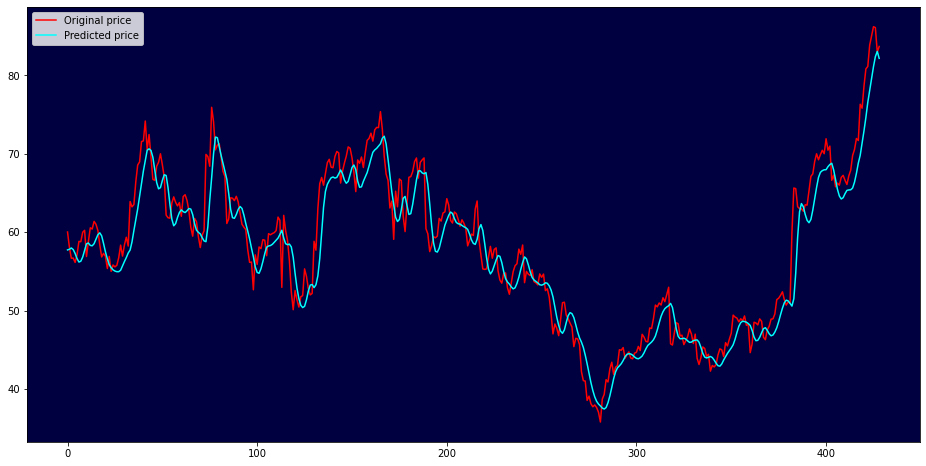

In [37]:
# Visualize the results returned by the model
make_predictions = model.predict(x_test)
make_predictions = scaler.inverse_transform(make_predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(make_predictions, color='cyan', label='Predicted price')
plt.legend()